
This is a modified version of the [original notebook](https://www.tensorflow.org/lite/tutorials/model_maker_image_classification) from the Tensorflow Authors


In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#!pip install -q tflite-model-maker

In [4]:
import os
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tflite_model_maker'

In [2]:
# We use the prepared images (see image_preperation.ipynb) for training
# 00_10plusminleft: figures on the wama display from 10 and greater
# 01_9minleft: figures from 0-9
# 02_off: no figures on the display
image_path = "./wama-camera-labeled-prepared"

Step 1.   Load input data specific to an on-device ML app. Split it into training data and testing data.

2023-01-15 20:49:39.660451: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-15 20:49:39.660518: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-15 20:49:39.660557: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (debian11-iob-adapter-dev): /proc/driver/nvidia/version does not exist
2023-01-15 20:49:39.686728: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Load image with size: 3462, num_label: 3, labels: 00_10plusminleft, 01_9minleft, 02_off.


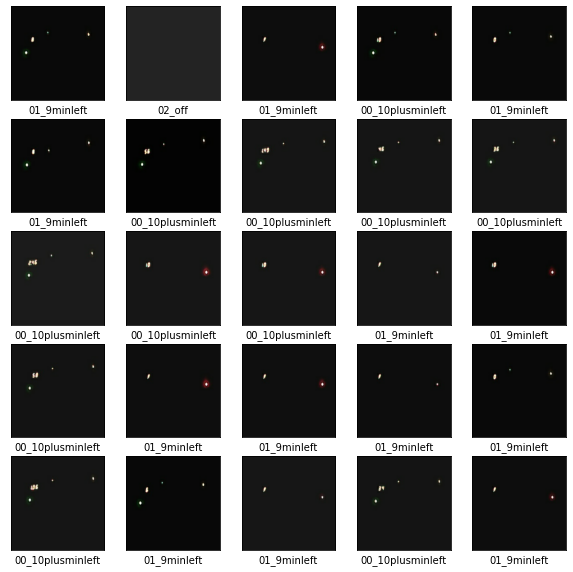

In [3]:
data = DataLoader.from_folder(image_path)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

Step 2. Customize the TensorFlow model.

In [4]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=10)

# If you get: OSError: SavedModel file does not exist at: <user>\AppData\Local\Temp\tfhub_modules\....
# delete folder ...\Temp\tfhub_modules and retry

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10


/home/peter/VSCodeProjects/wamaclassifier/env/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
2023-01-15 20:50:09.276462: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 154140672 exceeds 10% of free system memory.


 1/86 [..............................] - ETA: 4:26 - loss: 1.0192 - accuracy: 0.4375

2023-01-15 20:50:09.668371: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 154140672 exceeds 10% of free system memory.


 2/86 [..............................] - ETA: 28s - loss: 1.0114 - accuracy: 0.4375 

2023-01-15 20:50:09.990439: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 154140672 exceeds 10% of free system memory.


 3/86 [>.............................] - ETA: 27s - loss: 0.9762 - accuracy: 0.4479

2023-01-15 20:50:10.302158: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 154140672 exceeds 10% of free system memory.


 4/86 [>.............................] - ETA: 27s - loss: 0.9592 - accuracy: 0.4375

2023-01-15 20:50:10.650329: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 154140672 exceeds 10% of free system memory.


86/86 [==============================] - 33s 355ms/step - loss: 0.6236 - accuracy: 0.7863 - val_loss: 0.4949 - val_accuracy: 0.8931
Epoch 2/10
86/86 [==============================] - 33s 378ms/step - loss: 0.5034 - accuracy: 0.8852 - val_loss: 0.4542 - val_accuracy: 0.9335
Epoch 3/10
86/86 [==============================] - 31s 366ms/step - loss: 0.4703 - accuracy: 0.9004 - val_loss: 0.4434 - val_accuracy: 0.9306
Epoch 4/10
86/86 [==============================] - 31s 362ms/step - loss: 0.4566 - accuracy: 0.9193 - val_loss: 0.4487 - val_accuracy: 0.9220
Epoch 5/10
86/86 [==============================] - 32s 373ms/step - loss: 0.4505 - accuracy: 0.9215 - val_loss: 0.4239 - val_accuracy: 0.9422
Epoch 6/10
86/86 [==============================] - 32s 373ms/step - loss: 0.4426 - accuracy: 0.9251 - val_loss: 0.4159 - val_accuracy: 0.9393
Epoch 7/10
86/86 [==============================] - 30s 352ms/step - loss: 0.4324 - accuracy: 0.9350 - val_loss: 0.4120 - val_accuracy: 0.9335
Epoch 8/10

Step 3. Evaluate the model.

In [5]:
loss, accuracy = model.evaluate(test_data)
model.summary()

11/11 [==============================] - 5s 357ms/step - loss: 0.3905 - accuracy: 0.9597
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________


Step 4.  Export to TensorFlow Lite model.

Here, we export TensorFlow Lite model with [metadata](https://www.tensorflow.org/lite/convert/metadata) which provides a standard for model descriptions. The label file is embedded in metadata. The default post-training quantization technique is full integer quantization for the image classification task.

In [6]:
# Creates file model.tflite
model.export(export_dir='.') 
# Export only labels.txt
# model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Assets written to: /tmp/tmp6b87homv/assets


INFO:tensorflow:Assets written to: /tmp/tmp6b87homv/assets
2023-01-15 21:19:07.561974: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-01-15 21:19:07.562079: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
/home/peter/VSCodeProjects/wamaclassifier/env/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2023-01-15 21:19:08.874168: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-01-15 21:19:08.874204: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


fully_quantize: 0, inference_type: 6, input_inference_type: 3, output_inference_type: 3
INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp67vhr1i6/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmp67vhr1i6/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [9]:

def recreate_labels():
  # 1) We use this in order to ignore any hidden files that might be here.
  # 'Datasets' is the name of the folder where we store our training data. The 'listdir' is used to fetch all the folder names.
  labels = [folder for folder in os.listdir(image_path) if not folder.startswith('.')]
  
  # 2) Then, we output the contents of each folder name to a file.
  with open('labels.txt', 'w') as file:
    for label in labels:
      file.write(label)
      file.write('\n')

# Recreate labels.txt - should be created with model.export but can't find Temp folder where it ought to be
# We use labels.txt to show the labels when running inference with tflite runtime
recreate_labels() 

11/11 [==============================] - 4s 330ms/step


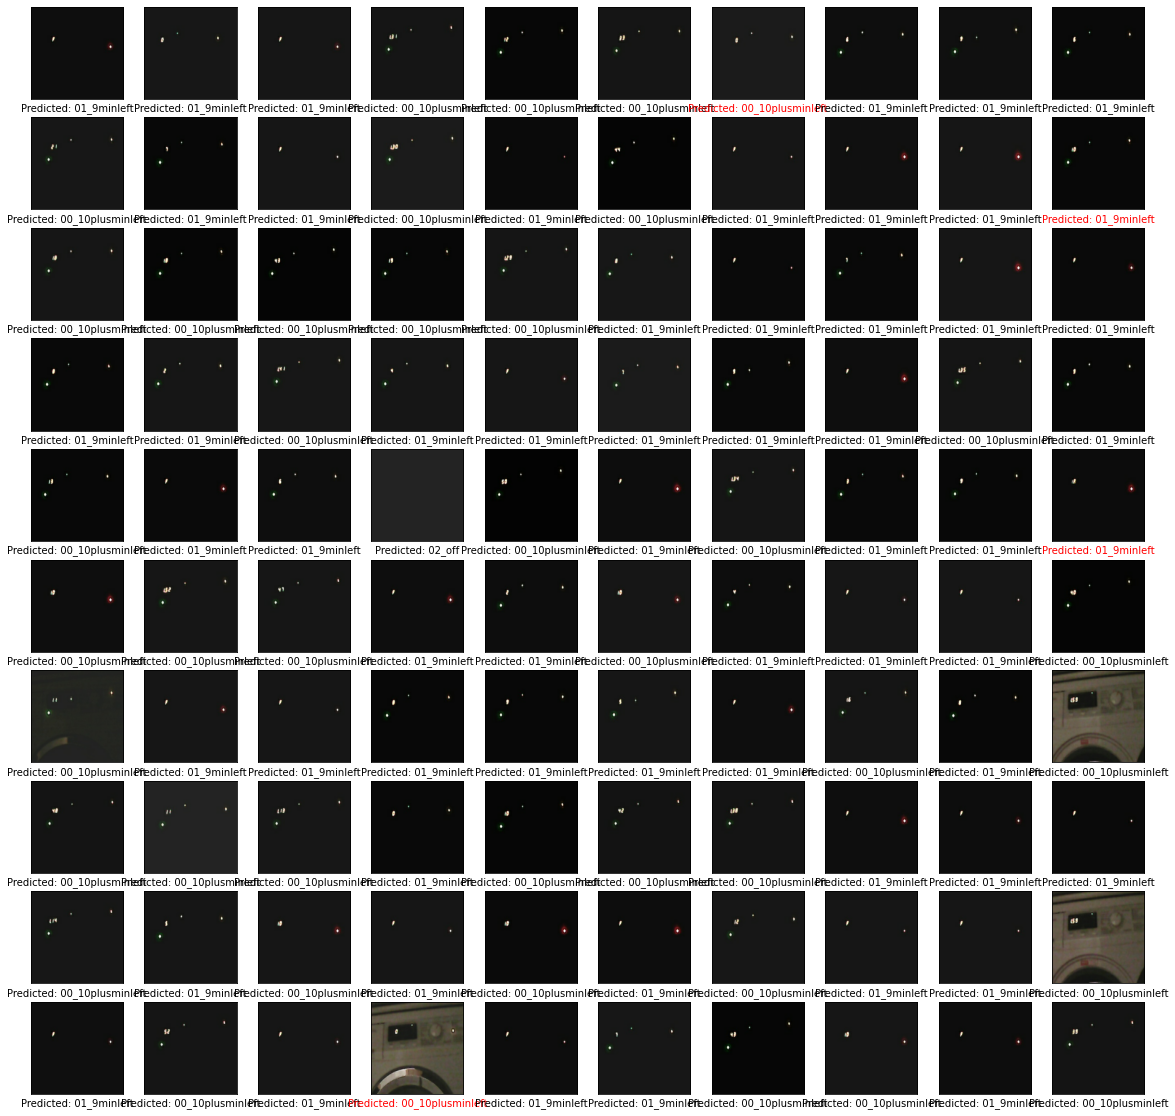

In [7]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [11]:
# model.json is not needed for classification - just if you're interested
from tflite_support import metadata as _metadata
export_file = "model.tflite"
export_json_file = "model.json"

displayer = _metadata.MetadataDisplayer.with_model_file(export_file)
json_content = displayer.get_metadata_json()
# Optional: write out the metadata as a json file
with open(export_json_file, "w") as f:
  f.write(json_content)